# Taller 6

## Métodos Computacionales 1 2022-10

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ApellidoNombre_Taller6.ipynb. **El archivo debe poder correr en el binder de la magistral** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los casos de prueba, puede correr los casos de prueba pero no modificarlos.

**Entrega: Lunes 16 de Mayo 11:59 pm**

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, multivariate_normal
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

## Problema 1

Resolver los siguientes problemas con 30000 pasos de MonteCarlo. Además planteé la ecuación que resuelve el problema

a) Un examen de opción múltiple contiene 30 preguntas, cada una con cinco respuestas posibles. Supongase que el estudiante sólo adivina las respuestas. ¿Cuál es la probabilidad de que el estudiante conteste de manera correcta más de 20 preguntas? 

a) En una central teléfonica se reciben llamadas según las leyes de un proceso de Poisson, con un promedio de diez llamadas por hora, ¿Cuál es la probabilidad de que ninguna llamada sea recibida entre las 8am y las 12 del medio día?

Escriba aquí tus ecuaciones aquí

In [2]:
#PUNTO A
def punto_A(num_points=30000, n=30, p=1/5, num_x=20): #Distribución binomial
    #P(x>20) = 1 - P(x<=10) = sum[n,x] * p^x * q^(n-x) = 1 - sum[30,20] * 0.2^20 * 0.8^(30-20)
    y = np.zeros(num_points)
    uni_dist = np.random.binomial(n, p, num_points)
    for value in uni_dist:
        y[value] += 1
    y /= num_points
    min_x = -5
    max_x = 5
    min_y = 0.0
    max_y = np.amax(y)
    random_y = np.random.rand(num_points) * (max_y - min_y) + min_y
    index = np.where(y - random_y > 0.0)
    interval_integral = (max_y-min_y) * (max_x - min_x)
    integral  = interval_integral * (np.size(index)/(1.0*np.size(random_y)))
    print(f"a) P = {integral*100}")

#PUNTO B
def punto_B(num_points=30000, lambda_poisson=10, k=0):
    #Distribución de Poisson
    #p(x)=((e^(-lambda))*(lambda^x))/(x!))=((e^(-10))*(lambda^0))/(0!)
    x = np.arange(0, num_points, 1)
    y = stats.poisson.pmf(x, mu=lambda_poisson)
    min_x = -10
    max_x = 10
    min_y = 0.0
    max_y = np.amax(y)
    random_y = np.random.rand(num_points) * (max_y - min_y) + min_y
    index = np.where(y - random_y > 0.0)
    interval_integral = (max_y-min_y) * (max_x - min_x)
    integral  = interval_integral * (np.size(index)/(1.0*np.size(random_y)))
    print(f"b) P = {integral*100}")

punto_A()
punto_B()

a) P = 0.024035555555555557
b) P = 0.06672535238460464


## Problema 2

Considere las dos caracteristicas "Alcohol level" y "Alcalinity level" del conjunto de datos [wine_data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). Pueden usar el notebook que vimos en clase la referencia es el siguiente curso. 
[Machine Learning Fundamentals UC San Diego](https://www.edx.org/es/course/machine-learning-fundamentals-2)

In [3]:
from sklearn.datasets import load_wine

alcohol_levels = load_wine()['data'][:, [0]].ravel()
alcalinity_levels = load_wine()['data'][:, [3]].ravel()

np.random.seed(0)
perm = np.random.permutation(178)
trainx = alcohol_levels[perm[0:130]]
trainy = alcalinity_levels[perm[0:130]]
testx = alcohol_levels[perm[130:178]]
testy = alcalinity_levels[perm[130:178]]

alcohol_levels.shape, alcalinity_levels.shape

((178,), (178,))

a) A partir de esas dos caracteristicas del vino, calcule el vector $\vec{\mu}$ y la matrix de covarianza $\Sigma$, 

$$
\vec{\mu} = \begin{bmatrix}
\mu_x\\
\mu_y
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y)\\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
$$

In [9]:
mu = np.zeros(2)
covar = np.zeros((2, 2))

def fit_gaussian(x):
    mu[0] = np.mean(x[0], axis=0)
    mu[1] = np.mean(x[1], axis=0)
    covar = np.cov(x[0], x[1], rowvar=0, bias=1)
    return mu, covar

mu, covar = fit_gaussian((alcohol_levels, alcalinity_levels))
print(f"mu: {mu}")
print(f"covar: {covar}")

mu: [13.00061798 19.49494382]
covar: [[ 0.65535973 -0.83636766]
 [-0.83636766 11.09003061]]


b) A partir del la matriz de covarianza dibuje los puntos y la gaussiana bivariada, con las curvas de nivel.

El resultado se tiene que ver como lo siguiente, 

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image11.png)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

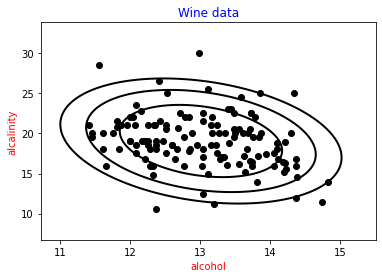

In [32]:
def find_range(x):
    lower = min(x)
    upper = max(x)
    width = upper - lower
    lower = lower - 0.2 * width
    upper = upper + 0.2 * width
    return lower, upper
#find_range(alcohol_levels)

def plot_contours(mu, cov, x1g, x2g, col="black"):
    rv = multivariate_normal(mean=mu, cov=cov)
    z = np.zeros((len(x1g),len(x2g)))
    for i in range(0,len(x1g)):
        for j in range(0,len(x2g)):
            z[j,i] = rv.logpdf([x1g[i], x2g[j]])
    sign, logdet = np.linalg.slogdet(cov)
    normalizer = -0.5 * (2 * np.log(6.28) + sign * logdet)
    for offset in range(1,4):
        plt.contour(x1g,x2g,z, levels=[normalizer - offset], colors=col, linewidths=2.0, linestyles='solid')

@interact_manual( f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1), label=IntSlider(1,1,3,1) )
def two_features_plot():
    x1_lower, x1_upper = find_range(trainx)
    x2_lower, x2_upper = find_range(trainy)
    plt.xlim(x1_lower, x1_upper)
    plt.ylim(x2_lower, x2_upper)
    plt.plot(trainx, trainy, 'ro', color="k")
    res = 200
    x1g = np.linspace(x1_lower, x1_upper, res)
    x2g = np.linspace(x2_lower, x2_upper, res)
    mu, cov = fit_gaussian((trainx, trainy))
    plot_contours(mu, cov, x1g, x2g, 'black')
    plt.title('Wine data', color='blue')
    plt.xlabel("alcohol", color='red')
    plt.ylabel("alcalinity", color='red')
    plt.show()

two_features_plot()

c) Diagonalice la matriz de covarianza, es decir obtenga los valores propios y vectores propios de la matriz de covarianza

In [35]:
# Tu codigo aquí
eig_vals = np.zeros(2)
eig_vecs = np.zeros((2, 2))

eig_vals, eig_vecs = np.linalg.eig(covar)

print(eig_vals,"\n", eig_vecs)

[ 0.58874779 11.15664256] 
 [[-0.9968434   0.07939293]
 [-0.07939293 -0.9968434 ]]


d) A partir de los vectores propios y valores propios de la matriz, y el vector $\vec{\mu}$.

*   Desplace los datos de forma que el promedio de los datos en juntas coordenadas sea cero.
*   Rote los datos de forma que la covarianza de los datos sea cero.
*   Gráfique la gaussiana de los nuevos datos rotados con sus curvas de nivel, a partir de la diagonzalización de la matrix de covarianza original (parte c). No volver a usar la función `np.cov()` de numpy.

Una rotación de puntos en dos dimensiones se puede ver como una matriz de la forma,

$$
\text{Rot}(\theta) = \begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

La gráfica se debe ver como lo siguiente,

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image12.png)

In [7]:
# tu codigo aqui




Nota: Las coordenadas de los nuevos datos se llaman Componentes principales, lo que hicimos fue basicamente el método PCA, el cual permite reducir la dimensionalidad de los datos, ignorando las componentes menos importantes.

## Problema 3

Un método para medir el nivel de pH de una solución resulta en una medición con un valor que está distribuido de forma normal con un promedio igual al nivel de pH y una desviación estándar de 0.05. Un ingeniero ambiental afirma que las dos soluciones vienen de la misma fuente. Si esta hipótesis fuera correcta entonces el nivel de pH de las soluciones sería igual. Para probar la veracidad de esta afirmación se realizaron 10 mediciones independientes del nivel de pH de juntas soluciones, los datos son los siguientes.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image10.png)

1.   Calcule el $p$ value, guárdelo en la variable `p_value`.
2.   Qué puede concluir con un level of significance de $\alpha = 0.05$, guarde la conclusión en el string `conclusion`

Incluya el siguiente `print` al final:

```
print(f"p value = {p_value}, la conclusion es:  {conclusion}")
```





In [8]:
#Ho -> A==B
#Ha -> A!=B

p_value = 0
conclusion = ""

sigma = 0.05
meas_A = [6.24, 6.31, 6.28, 6.30, 6.25, 6.26, 6.24, 6.29, 6.22, 6.28]
meas_B = [6.27, 6.25, 6.33, 5.27, 6.24, 6.31, 6.28, 6.29, 6.34, 6.27]

miu = np.sum(meas_A) / len(meas_A)
mean = np.sum(meas_B) / len(meas_B)

sigma_mean = (miu - mean) / np.sqrt(len(meas_A))
z = (miu - mean) / sigma_mean
p_value = 2 * norm.cdf(z, loc=miu/1.977, scale=sigma)

alpha = 0.05
if p_value > alpha:
    conclusion = "verdadera"
else:
    conclusion = "falsa"

print(p_value)
print(f"p value = {p_value}, la conclusion es:  {conclusion}")

0.8779753457173989
p value = 0.8779753457173989, la conclusion es:  verdadera
